# Car Price Analysis


DATA SET INCLUDE OVER 46K CAR DATAS FROM GERMANY , REGISTRATION FROM 2011 TO 2022

## Importing data set
## Data Wrangling
## Exploratory Data Analyses
## Model Development
## Model Evaluation and Refinement



In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [137]:
path=r"C:\Users\ERCAN\Desktop\PORTFOLIO\CAR PRICE\dataset_germany-cars-zenrows.csv"

In [138]:
df=pd.read_csv(path)

In [139]:
df.head(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
7,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


## Drop nulls

In [141]:
cars_data=df.dropna()
cars_data.count()

mileage      46071
make         46071
model        46071
fuel         46071
gear         46071
offerType    46071
price        46071
hp           46071
year         46071
dtype: int64

## Check the typo of datas

In [142]:
cars_data["fuel"].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [143]:
cars_data["gear"].unique()

array(['Manual', 'Automatic', 'Semi-automatic'], dtype=object)

In [144]:
cars_data["offerType"].unique()

array(['Used', 'Demonstration', "Employee's car", 'Pre-registered', 'New'],
      dtype=object)

In [145]:
cars_data["make"].unique()

array(['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota',
       'Opel', 'Mazda', 'Ford', 'Mercedes-Benz', 'Chevrolet', 'Audi',
       'Fiat', 'Kia', 'Dacia', 'MINI', 'Hyundai', 'Skoda', 'Citroen',
       'Infiniti', 'Suzuki', 'SsangYong', 'smart', 'Cupra', 'Volvo',
       'Jaguar', 'Porsche', 'Nissan', 'Honda', 'Mitsubishi', 'Lexus',
       'Jeep', 'Maserati', 'Bentley', 'Land', 'Alfa', 'Subaru', 'Dodge',
       'Microcar', 'Lamborghini', 'Lada', 'Tesla', 'Chrysler', 'McLaren',
       'Aston', 'Rolls-Royce', 'Lancia', 'Abarth', 'DS', 'Daihatsu',
       'Ligier', 'Ferrari', 'Aixam', 'Zhidou', 'Morgan', 'Maybach', 'RAM',
       'Alpina', 'Polestar', 'Brilliance', 'Piaggio', 'FISKER', 'Others',
       'Cadillac', 'Iveco', 'Isuzu', 'Corvette', 'Baic', 'DFSK',
       'Estrima', 'Alpine'], dtype=object)

### Define the data dominant car brands and type

Volkswagen, Opel and Ford seems dominant brands


In [146]:
cars_data["make"].value_counts().head(10)

Volkswagen       6907
Opel             4789
Ford             4410
Skoda            2874
Renault          2792
Audi             2681
BMW              2392
Mercedes-Benz    2341
SEAT             1922
Hyundai          1880
Name: make, dtype: int64

In [147]:
cars_data["fuel"].value_counts()

Gasoline             28720
Diesel               15178
Electric/Gasoline     1146
Electric               661
LPG                    125
CNG                    116
Electric/Diesel         53
Others                  47
-/- (Fuel)              22
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64

In [148]:
cars_data["model"].value_counts().head(10)

Golf       1489
Corsa      1485
Fiesta     1273
Astra      1190
Focus       985
up!         943
Fabia       916
Polo        893
forTwo      710
Octavia     665
Name: model, dtype: int64

In [149]:
cars_data["gear"].value_counts()

Manual            30309
Automatic         15706
Semi-automatic       56
Name: gear, dtype: int64

In [150]:
cars_data["offerType"].value_counts()

Used              39822
Pre-registered     2768
Demonstration      2351
Employee's car     1117
New                  13
Name: offerType, dtype: int64

In [151]:
cars_data.describe()

,mileage,price,hp,year
count,4.607100e+04,4.607100e+04,46071.000000,46071.000000
mean,7.123314e+04,1.656312e+04,132.992663,2016.012155
std,6.245413e+04,1.927960e+04,75.074689,3.155555
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.990000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.100000e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


### There are big differences between max and mean values of "price" and "hp" datas. Find and remove all prices over the 99.5% percentile.

In [152]:
cars_data=cars_data[cars_data["price"]<cars_data["price"].quantile(0.995)].reset_index(drop=True)

In [153]:
cars_data=cars_data[cars_data["hp"]<cars_data["hp"].quantile(0.995)].reset_index(drop=True)

### Analysis of Non Numerical parameters effect on prices

<AxesSubplot:xlabel='gear', ylabel='price'>

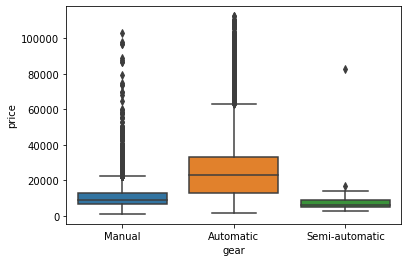

In [154]:
sns.boxplot(x="gear", y="price", data=cars_data)

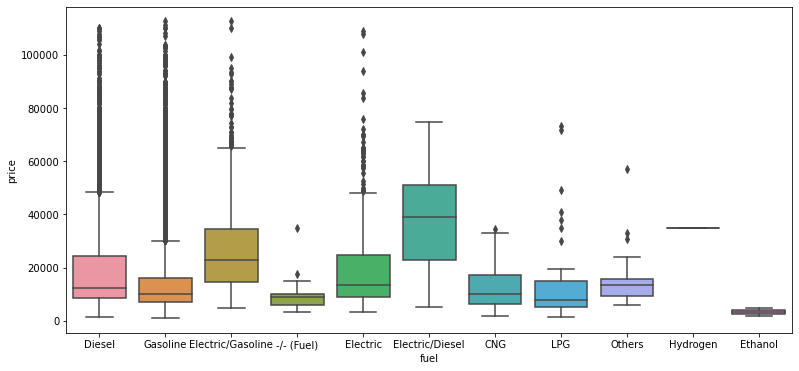

In [155]:
sns.boxplot(x="fuel", y="price", data= cars_data )
plt.gcf().set_size_inches(13, 6)

In [156]:
cars_data.corr()

,mileage,price,hp,year
mileage,1.000000,-0.395162,0.023868,-0.676923
price,-0.395162,1.000000,0.760121,0.557675
hp,0.023868,0.760121,1.000000,0.159353
year,-0.676923,0.557675,0.159353,1.000000


### We should make Volkswagen car price model according to this datasets

In [163]:
Volkswagen_data=cars_data.query("make=='Volkswagen'")
Volkswagen_data

,mileage,make,model,fuel,gear,offerType,price,hp,year
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
11,84000,Volkswagen,Golf,Gasoline,Manual,Used,6990,105.0,2011
15,72000,Volkswagen,Polo,Gasoline,Manual,Used,6999,60.0,2011
21,81970,Volkswagen,Golf,Gasoline,Manual,Used,7850,105.0,2012
23,193333,Volkswagen,Cross Touran,Diesel,Manual,Used,7900,105.0,2012
...,...,...,...,...,...,...,...,...,...
45540,5800,Volkswagen,T6 Multivan,Diesel,Automatic,Demonstration,77470,204.0,2021
45542,50,Volkswagen,T-Cross,Gasoline,Automatic,Pre-registered,23990,110.0,2021
45570,50,Volkswagen,Passat Variant,Gasoline,Automatic,Pre-registered,31450,150.0,2021
45581,100,Volkswagen,Golf,Diesel,Automatic,Pre-registered,32490,150.0,2021


In [160]:
from sklearn.linear_model import LinearRegression

In [167]:
lm=LinearRegression()

In [174]:
X=Volkswagen_data[["hp"]]
Y=Volkswagen_data[["price"]]
Z=Volkswagen_data[["hp","mileage","year"]]

### X will be used as Independent variable for Linear Regression 
### Z will be used as Independent variable for Multiple Linear Regression

In [175]:
lm.fit(X,Y)
lm.score(X,Y)

0.46961281900054797

In [177]:
lm2=LinearRegression()


In [179]:
lm2.fit(Z,Y)
lm2.score(Z,Y)

0.7496931246655453

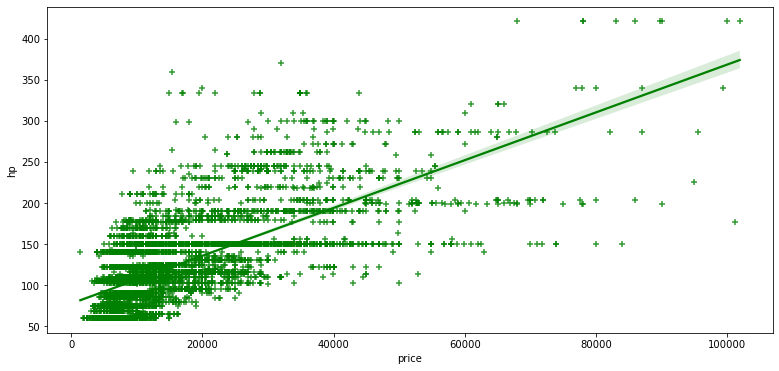

In [181]:
sns.regplot(x="price", y="hp" , data=Volkswagen_data , color="green", marker="+")
plt.gcf().set_size_inches(13, 6)

### Pipeline

In [187]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [188]:
Input=[("scale",StandardScaler()),("polynomial",PolynomialFeatures(include_bias=False)),("model",LinearRegression())]

In [192]:
pipe=Pipeline(Input)

In [193]:
pipe.fit(X,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [194]:
pipe.score(X,Y)

0.4708041113963046

In [195]:
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [196]:
pipe.score(Z,Y)

0.8156006941667285

### Model Evaluation and Refinement

In [210]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [211]:
z_train, z_test, y_train, y_test = train_test_split(Z, Y, test_size=0.15, random_state=1)


print("number of test samples :", z_test.shape[0])
print("number of training samples:",z_train.shape[0])

number of test samples : 1036
number of training samples: 5868


In [212]:
from sklearn.linear_model import Ridge

In [213]:
pr=PolynomialFeatures(degree=2)
z_train_pr=pr.fit_transform(z_train[["hp","mileage","year"]])
z_test_pr=pr.fit_transform(z_test[["hp","mileage","year"]] )

In [214]:
RidgeModel=Ridge(alpha=0.1)

RidgeModel.fit(z_train_pr, y_train)

C:\Users\ERCAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.82104e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.1)

In [215]:
RidgeModel.score(z_train_pr, y_train)

0.8145140320867016

In [224]:
z_train_pr=pr.fit_transform(z_train[["hp","mileage","year"]])

In [225]:
z_polly=pr.fit_transform(z_train[["hp","mileage","year"]])

In [226]:
RidgeModel=Ridge(alpha=0.1)

RidgeModel.fit(z_train_pr, y_train)

RidgeModel.score(z_train_pr, y_train)

C:\Users\ERCAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.82104e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.8145140320867016

In [227]:
z_test_pr=pr.fit_transform(z_test[["hp","mileage","year"]])

In [228]:
z_polly=pr.fit_transform(z_test[["hp","mileage","year"]])

In [229]:

RidgeModel=Ridge(alpha=0.1)

RidgeModel.fit(z_test_pr, y_test)

RidgeModel.score(z_test_pr, y_test)

C:\Users\ERCAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.73477e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.8150730993831938